In [196]:
import numpy as np
import numpy.fft
import scipy
from matplotlib import pylab as plt
def open_file(name_of_file): 
    values = []
    time = []
    with open(name_of_file) as file:
        for line in file:
            line = line.strip().split('\t')
            value = float(line[1])
            values.append(value)
    return values


def plot(values):
    x = np.arange(0, len(values))
    y = np.array(values[:len(values)])
    plt.plot(x, y)
    plt.show()

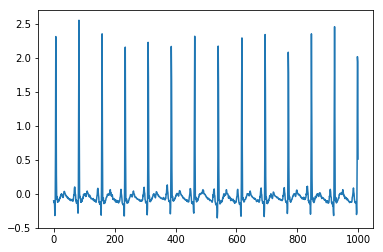

In [197]:
signal = open_file('13.txt')
plot(signal)

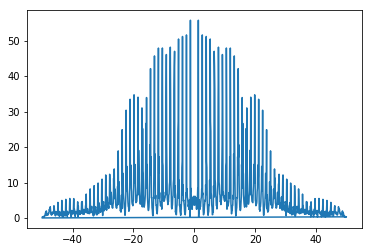

In [198]:
time_old = np.arange(0,10,0.01)
C = abs(np.fft.fft(signal)) # находим коэффициенты ДПФ
freq = numpy.fft.fftfreq(len(signal), d=0.01)
plt.plot(freq,C)
plt.show()

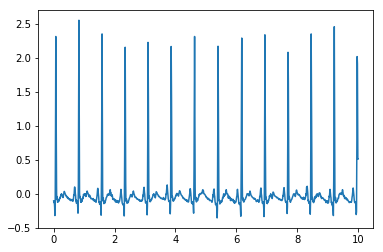

In [199]:
time_new = np.linspace(0,10,len(time_old)*100) 
interp_signal = np.interp(time_new, time_old, signal) 
fig=plt.figure() 
plt.plot(time_new, interp_signal) 
# plt.axis([0, 0.1, -1, 1])
plt.show()

1000

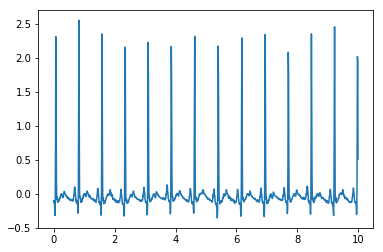

In [203]:
fig=plt.figure() 
plt.plot(time_old, signal) 
len(time_old)

Populating the interactive namespace from numpy and matplotlib


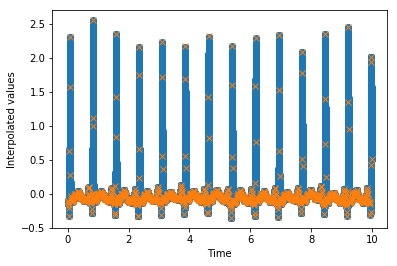

In [48]:
%pylab inline
plt.plot( time_new, interp_signal, 'o', time_old, signal, 'x', linewidth = 0.7)
xlabel('Time')
ylabel('Interpolated values')
plt.show()

Populating the interactive namespace from numpy and matplotlib


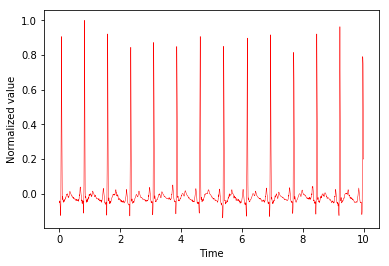

In [54]:
values_norm = []
i=0
max_value = 1/max(interp_signal)
while i < len(interp_signal):
    value_norm = interp_signal[i]*max_value
    values_norm.append(value_norm)
    i = i+1
    
%pylab inline
plt.plot( time_new, values_norm, 'r', linewidth = 0.5)
xlabel('Time')
ylabel('Normalized value')
plt.show()

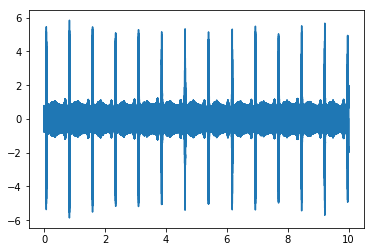

In [76]:
def amplitude_modulation(values_norm, m):
    modulated_signal = []
    for i in range(0,len(values_norm)):
        ms = (1 + m*values_norm[i])*math.sin(2*math.pi*500*time_new[i])
        modulated_signal.append(ms)
    return modulated_signal

fig=plt.figure() 
plt.plot(time_new, amplitude_modulation(values_norm, 5)) 
# plt.axis([0, 0.1, -1, 1])
plt.show()

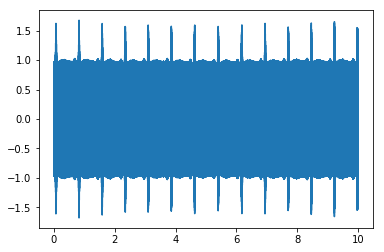

In [75]:
fig=plt.figure() 
plt.plot(time_new, amplitude_modulation(values_norm, 0.7)) 
# plt.axis([0, 0.1, -1, 1])
plt.show()

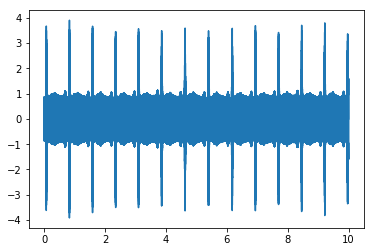

In [69]:
fig=plt.figure() 
plt.plot(time_new, amplitude_modulation(values_norm, 3)) 
# plt.axis([0, 0.1, -1, 1])
plt.show()

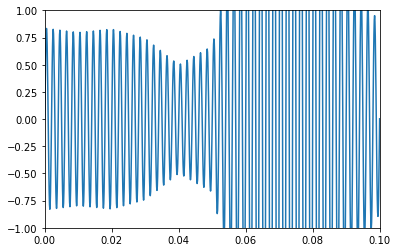

In [74]:
fig=plt.figure() 
plt.plot(time_new, amplitude_modulation(values_norm, 4)) 
plt.axis([0, 0.1, -1, 1])
plt.show()

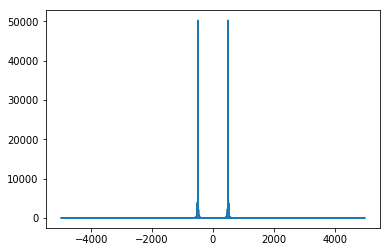

In [73]:
C2 = abs(np.fft.fft(amplitude_modulation(values_norm, 4))) # находим коэффициенты ДПФ
freq2 = numpy.fft.fftfreq(len(amplitude_modulation(values_norm, 4)), d=0.0001)
plt.plot(freq2,C2)
plt.show()

(-2, 2)

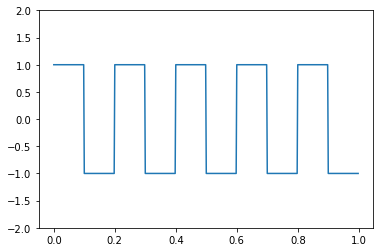

In [79]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

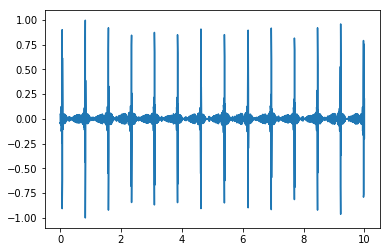

In [127]:
signal_norm_square =  values_norm * signal.square(10 * np.pi * 10 * time_new) 
# plt.axis([0, 0.4, 0, 0.1]) 
plt.plot(time_new, signal_norm_square)

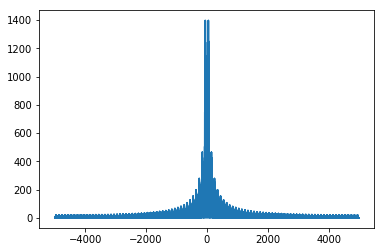

In [130]:
C3 = abs(np.fft.fft(signal_norm_square)) # находим коэффициенты ДПФ
freq3 = numpy.fft.fftfreq(len(signal_norm_square), d=0.0001)
plt.plot(freq3,C3)

[0, 0.05, -1, 1]

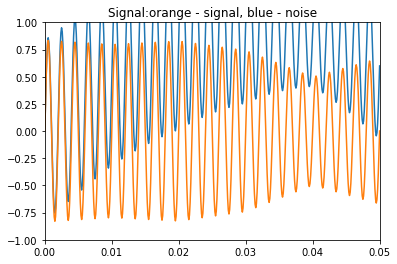

In [145]:
mean = 0 
std = 1
num_samples = len(amplitude_modulation(values_norm, 4))
noise50 = np.sin(50 * time_new)
signal_and_noise = amplitude_modulation(values_norm, 4) + noise50
plt.plot(time_new, signal_and_noise)
plt.plot(time_new, amplitude_modulation(values_norm, 4))
plt.title('Signal:orange - signal, blue - noise')
plt.axis([0, 0.05, -1, 1])

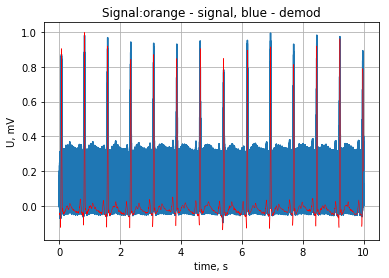

In [177]:
fd = 1 / 0.01
w0 = 2 * math.pi * 500
signal_demod = []
norma_demod = max(np.abs(signal_and_noise))
for i in range(0, len(time_new)):
    signal_demod.append((signal_and_noise[i] / norma_demod) * math.sin((w0 * time_new[i])))
    
plt.grid(True, which='both')
plt.plot(time_new, signal_demod)
# plt.plot(time_new, norm_signal_demod)
plt.xlabel('time, s')
plt.ylabel('U, mV')
plt.title('Signal:orange - signal, blue - demod')

plt.plot( time_new, values_norm, 'r', linewidth = 0.5)

plt.show()
# plt.axis([0, 0.05, -1, 1])

[-40, 40, 0, 800]

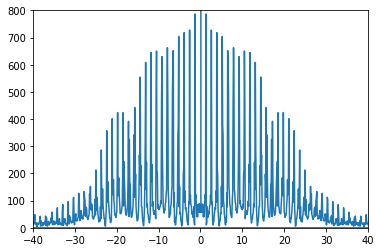

In [192]:
C4 = abs(np.fft.fft(signal_demod)) # находим коэффициенты ДПФ
freq4 = numpy.fft.fftfreq(len(signal_demod), d=0.0001)
plt.plot(freq4,C4)

plt.axis([-40, 40, 0, 800])